In [1]:
import sysid
import pylab as pl
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ss1 = sysid.StateSpaceDiscreteLinear(
    A=0.9, B=0.5, C=1, D=0, Q=0.01, R=0.01, dt=0.1)
ss1

{'A': matrix([[ 0.9]]), 'C': matrix([[1]]), 'B': matrix([[ 0.5]]), 'D': matrix([[0]]), 'Q': matrix([[ 0.01]]), 'R': matrix([[ 0.01]]), 'dt': 0.1}

In [3]:
#pl.seed(1234)
prbs1 = sysid.prbs(1000)
def f_prbs(t, x, i):
    return prbs1[i]

In [4]:
tf = 10
data = ss1.simulate(f_u=f_prbs, x0=pl.matrix(0), tf=tf)
ss1_id = sysid.subspace_det_algo1(y=data.y, u=data.u,
    f=5, p=5, s_tol=1e-1, dt=ss1.dt)
data_id = ss1_id.simulate(f_u=f_prbs, x0=0, tf=tf)
ss1_id

{'A': matrix([[ 0.91143098]]), 'C': matrix([[ 1.]]), 'B': matrix([[ 0.47498573]]), 'D': matrix([[ 0.02146557]]), 'Q': matrix([[ 0.]]), 'R': matrix([[ 0.]]), 'dt': 0.1}

fit 96.732607%


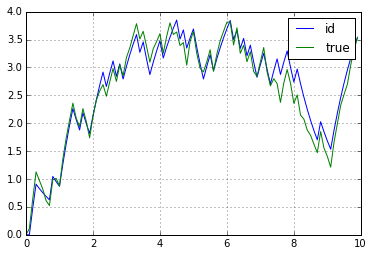

In [5]:
pl.plot(data_id.t.T, data_id.x.T, label='id');
pl.plot(data.t.T, data.x.T, label='true');
pl.legend()
pl.grid()
print 'fit {:f}%'.format(100*sysid.subspace.nrms(data_id.y, data.y))

In [6]:
ss2 = sysid.StateSpaceDiscreteLinear(
    A=pl.matrix([[0,0.1,0.2],[0.2,0.3,0.4],[0.4,0.3,0.2]]),
    B=pl.matrix([[1,0],[0,1],[0,-1]]),
    C=pl.matrix([[1,0,0],[0,1,0]]), D=pl.matrix([[0,0],[0,0]]),
    Q=pl.diag([0.01,0.01,0.01]), R=pl.diag([0.01,0.01]), dt=0.1)
ss2

{'A': matrix([[ 0. ,  0.1,  0.2],
        [ 0.2,  0.3,  0.4],
        [ 0.4,  0.3,  0.2]]), 'C': matrix([[1, 0, 0],
        [0, 1, 0]]), 'B': matrix([[ 1,  0],
        [ 0,  1],
        [ 0, -1]]), 'D': matrix([[0, 0],
        [0, 0]]), 'Q': matrix([[ 0.01,  0.  ,  0.  ],
        [ 0.  ,  0.01,  0.  ],
        [ 0.  ,  0.  ,  0.01]]), 'R': matrix([[ 0.01,  0.  ],
        [ 0.  ,  0.01]]), 'dt': 0.1}

In [7]:
pl.seed(1234)
prbs1 = sysid.prbs(1000)
prbs2 = sysid.prbs(1000)
def f_prbs_2d(t, x, i):
    i = i%1000
    return 2*pl.matrix([prbs1[i]-0.5, prbs2[i]-0.5]).T

In [8]:
tf = 8
data2 = ss2.simulate(
    f_u=f_prbs_2d, x0=pl.matrix([0,0,0]).T, tf=tf)
ss2_id = sysid.subspace_det_algo1(y=data2.y, u=data2.u,
    f=5, p=5, s_tol=0.1, dt=ss2.dt)
data2_id = ss2_id.simulate(
    f_u=f_prbs_2d,
    x0=pl.matrix(pl.zeros(ss2_id.A.shape[0])).T, tf=tf)
ss2_id

{'A': matrix([[ 0.0166165 ,  0.00169292,  0.05607038, -0.13220462],
        [ 0.28739022,  0.104385  ,  0.55464063,  0.08830973],
        [ 0.38435612,  0.3449215 ,  0.36466452, -0.4274758 ],
        [ 0.01050423,  0.03576625, -0.02002661,  1.03299666]]), 'C': matrix([[-2.3701063 , -1.44825786,  0.69480587, -0.09793591],
        [ 1.81985986, -2.32890046, -0.06942672, -0.02548017]]), 'B': matrix([[-0.28820026,  0.18173819],
        [-0.21527604, -0.29253395],
        [ 0.02937773,  0.0472133 ],
        [ 0.03948322,  0.0218771 ]]), 'D': matrix([[-0.04883856, -0.00670367],
        [-0.01686584, -0.03884342]]), 'Q': matrix([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]), 'R': matrix([[ 0.,  0.],
        [ 0.,  0.]]), 'dt': 0.1}

fit 90.113172%


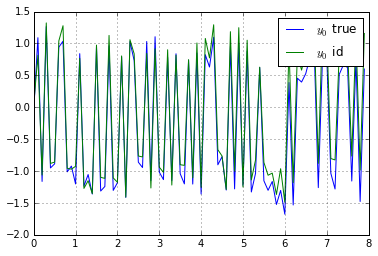

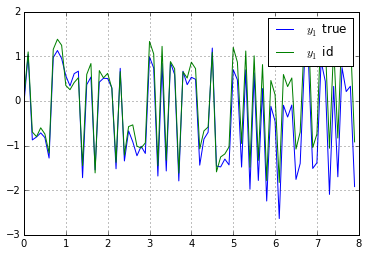

In [9]:
for i in range(2):
    pl.figure()
    pl.plot(data2_id.t.T, data2_id.y[i,:].T,
            label='$y_{:d}$ true'.format(i))
    pl.plot(data2.t.T, data2.y[i,:].T,
            label='$y_{:d}$ id'.format(i))
    pl.legend()
    pl.grid()
print 'fit {:f}%'.format(100*sysid.subspace.nrms(
        data2_id.y, data2.y))